# Taller 03: Series de Taylor y Polinomio de Lagrange

### Metodos Numericos 2025B 12/11/2025

### Kevin Eduardo Garcia Rodriguez 

### REALIZAR LOS EJERCICIOS DE POLINOMIOS DE TAYLOR

1. Coseno(x)

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def funcion_original1(x):
    return sp.cos(x)  # Ejemplo: función coseno

In [4]:
def serie_taylor(f, x0, orden):
    """
    Calcula la serie de Taylor de f en x0 hasta el grado 'orden'
    """
    x = sp.Symbol('x')
    taylor = f.series(x, x0, orden + 1).removeO()
    return sp.simplify(taylor)


In [5]:

def graficar_aproximaciones(funcion, taylor, taylor1, rango=(-3, 3)):
    x = sp.Symbol('x')
    
    # Convertir a funciones NumPy
    f_num = sp.lambdify(x, funcion, 'numpy')
    t_num = sp.lambdify(x, taylor, 'numpy')
    
    # Manejar el caso cuando taylor1 es constante (por ejemplo, 1)
    if isinstance(taylor1, (int, float, sp.Integer, sp.Float)):
        def t_num2(vals):
            return np.ones_like(vals) * float(taylor1)
    else:
        t_num2 = sp.lambdify(x, taylor1, 'numpy')

    # Valores de x
    xs = np.linspace(rango[0], rango[1], 400)

    # Crear figura
    plt.figure(figsize=(10,6))
    plt.plot(xs, f_num(xs), label='Función original cos(x)', linewidth=2)
    plt.plot(xs, t_num(xs), '--', label='Serie de Taylor Grado 4', linewidth=2)
    plt.plot(xs, t_num2(xs), '--', label='Serie de Taylor Grado 1', linewidth=2)
    
    plt.grid(True)
    plt.legend()
    plt.title('Comparación: Función Original vs Polinomios de Taylor')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-2, 2)
    plt.show()

    


In [6]:
f1 = funcion_original1(sp.Symbol('x'))
x0=0  # Punto alrededor del cual se expande
grado_taylor = 4  # Grado del polinomio de Taylor
grado_taylor1 = 1  # Grado del polinomio de Taylor 1
# Serie de Taylor alrededor de 0, grado especificado
taylor_f = serie_taylor(f1, 0, grado_taylor)
taylor_f1 = serie_taylor(f1, 0, grado_taylor1)

print("Serie de Taylor grado:", grado_taylor)
print(taylor_f)

print("Serie de Taylor grado:", grado_taylor1)
print(taylor_f1)

Serie de Taylor grado: 4
x**4/24 - x**2/2 + 1
Serie de Taylor grado: 1
1


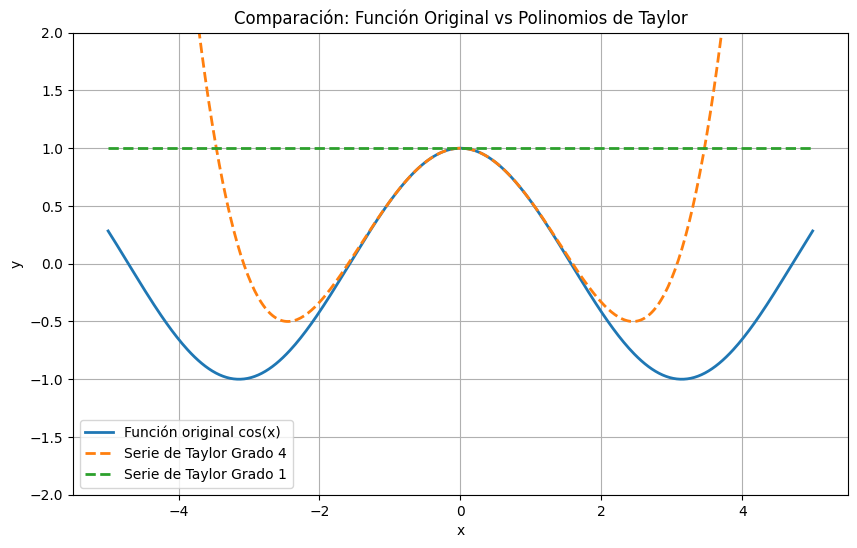

In [7]:
graficar_aproximaciones(f1, taylor_f, taylor_f1, rango=(-5,5))

2.1/1-x

Polinomios de Taylor para f(x) = 1 / (1 - x):
Orden 1: T_1(x) = 1 + x
Orden 2: T_2(x) = 1 + x + x**2
Orden 3: T_3(x) = 1 + x + x**2 + x**3
Orden 5: T_5(x) = 1 + x + x**2 + x**3 + x**4 + x**5
Orden 10: T_10(x) = 1 + x + x**2 + x**3 + x**4 + x**5 + x**6 + x**7 + x**8 + x**9 + x**10


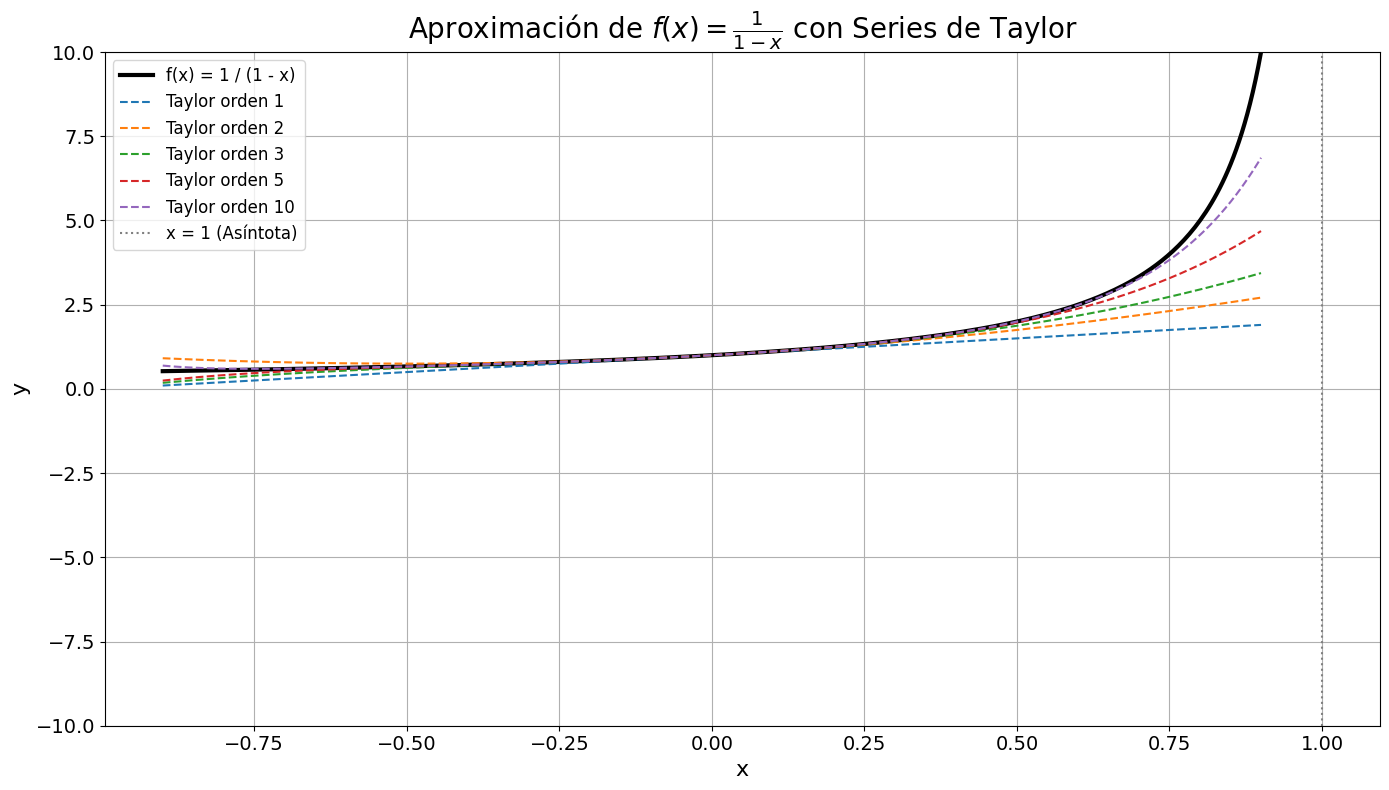

In [13]:
# Definimos la función original
def f(x):
    return 1 / (1 - x)

# Función para generar el polinomio de Taylor como texto
def taylor_series_expr(n):
    terms = [f"x**{k}" if k > 1 else ("x" if k == 1 else "1") for k in range(n + 1)]
    return " + ".join(terms)

# Función para evaluar el polinomio de Taylor
def taylor_series(x, n):
    return sum([x**k for k in range(n + 1)])

# Rango de x (evitamos x = 1)
x = np.linspace(-0.9, 0.9, 400)

# Órdenes a graficar
ordenes = [1, 2, 3, 5, 10]

# Imprimir los polinomios
print("Polinomios de Taylor para f(x) = 1 / (1 - x):")
for n in ordenes:
    print(f"Orden {n}: T_{n}(x) = {taylor_series_expr(n)}")

# Crear figura más grande
plt.figure(figsize=(14, 8))  # Tamaño aumentado

# Graficar función original
plt.plot(x, f(x), label='f(x) = 1 / (1 - x)', color='black', linewidth=3)

# Graficar aproximaciones de Taylor
for n in ordenes:
    plt.plot(x, taylor_series(x, n), label=f'Taylor orden {n}', linestyle='--')

# Añadir detalles y aumentar tamaño de texto
plt.axvline(x=1, color='gray', linestyle=':', label='x = 1 (Asíntota)')
plt.title('Aproximación de $f(x) = \\frac{1}{1 - x}$ con Series de Taylor', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.ylim(-10, 10)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()  # Ajustar para evitar que se corte algo
plt.show()

3-ln(x) con x=1

Polinomios de Taylor para ln(x) alrededor de x0 = 1:
Orden 1: (x - 1)^1/1
Orden 2: (x - 1)^1/1 - (x - 1)^2/2
Orden 3: (x - 1)^1/1 - (x - 1)^2/2 + (x - 1)^3/3
Orden 5: (x - 1)^1/1 - (x - 1)^2/2 + (x - 1)^3/3 - (x - 1)^4/4 + (x - 1)^5/5


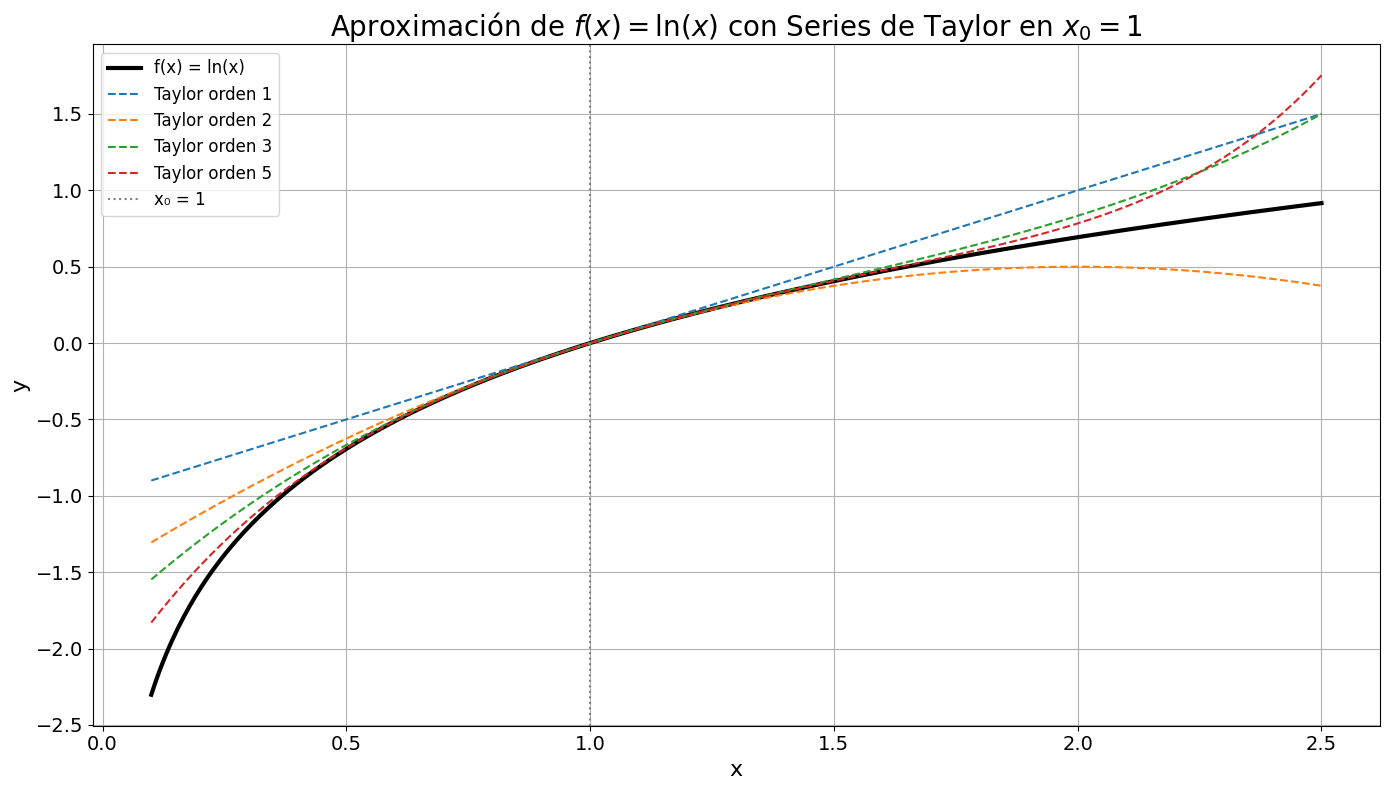

In [14]:
# Función original
def f(x):
    return np.log(x)

# Serie de Taylor para ln(x) en x0 = 1 hasta orden n
def taylor_ln(x, n):
    result = np.zeros_like(x)
    for k in range(1, n + 1):
        term = ((-1)**(k + 1)) * ((x - 1)**k) / k
        result += term
    return result

# Rango de valores de x (evitar x <= 0 y x = 0)
x = np.linspace(0.1, 2.5, 400)

# Órdenes que queremos graficar
ordenes = [1, 2, 3, 5]

# Imprimir polinomios (como texto simbólico)
print("Polinomios de Taylor para ln(x) alrededor de x0 = 1:")
for n in ordenes:
    terms = [f"{' - ' if k % 2 == 0 else ' + '}(x - 1)^{k}/{k}" for k in range(1, n + 1)]
    formula = ''.join(terms).replace('+', '', 1).strip()
    print(f"Orden {n}: {formula}")

# Graficar
plt.figure(figsize=(14, 8))
plt.plot(x, f(x), label='f(x) = ln(x)', color='black', linewidth=3)

# Aproximaciones de Taylor
for n in ordenes:
    plt.plot(x, taylor_ln(x, n), label=f'Taylor orden {n}', linestyle='--')

plt.axvline(x=1, color='gray', linestyle=':', label='x₀ = 1')
plt.title('Aproximación de $f(x) = \\ln(x)$ con Series de Taylor en $x_0=1$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

### EJERCICIO DE 3 PUNTOS EJEMPLO EN CLASE

In [38]:
def polinomio_lagrange(puntos):
    """
    Calcula el polinomio de Lagrange dado un conjunto de puntos [(x0,y0), (x1,y1), ...]
    """
    x = sp.Symbol('x')
    n = len(puntos)
    polinomio = 0
    for i in range(n):
        xi, yi = puntos[i]
        yi = sp.N(yi).as_real_imag()[0] ##AQUI ESTA EL CAMBIO
        Li = 1
        for j in range(n):
            if i != j:
                xj, _ = puntos[j]
                Li *= (x - xj) / (xi - xj)
        polinomio += yi * Li
    return sp.expand(polinomio)

In [40]:
def graficar_lagrange(puntos):
    """
    Grafica el polinomio de Lagrange y los puntos dados.
    """
    # Obtener el polinomio simbólico
    polinomio = polinomio_lagrange(puntos)
    x = sp.Symbol('x')

    # Convertir a función numérica para graficar
    f_lagrange = sp.lambdify(x, polinomio, modules=['numpy'])

    # Crear rango de valores de x para graficar
    xs = np.linspace(min([p[0] for p in puntos]) - 1, max([p[0] for p in puntos]) + 1, 400)
    ys = f_lagrange(xs)

    # Graficar la curva del polinomio
    plt.figure(figsize=(8, 5))
    plt.plot(xs, ys, label=f'Lagrange', color='blue')

    # Graficar los puntos originales
    px, py = zip(*puntos)
    plt.scatter(px, py, color='red', zorder=5, label='Puntos dados')

    # Títulos y etiquetas
    plt.title('Polinomio Interpolante de Lagrange')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

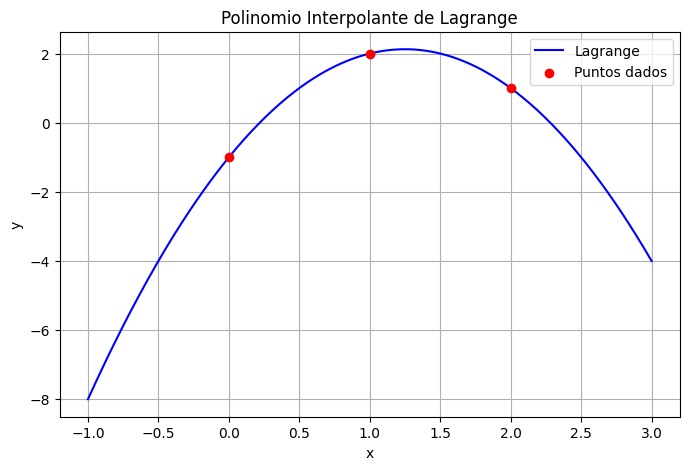

In [41]:
puntos = [(0, -1), (1, 2), (2,1)]
lagrange_f = graficar_lagrange(puntos)

### EJERCICIOS DEL TALLER 3 LAGRANGE

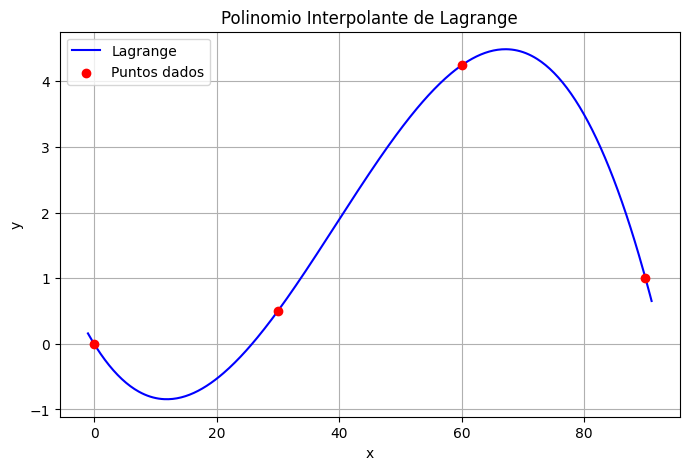

In [46]:
# Lista 1
puntos1 = [(0, 0), (30, 0.5), (60, 3 * (2**0.5)), (90, 1)]
lagrange_f1 = graficar_lagrange(puntos1)

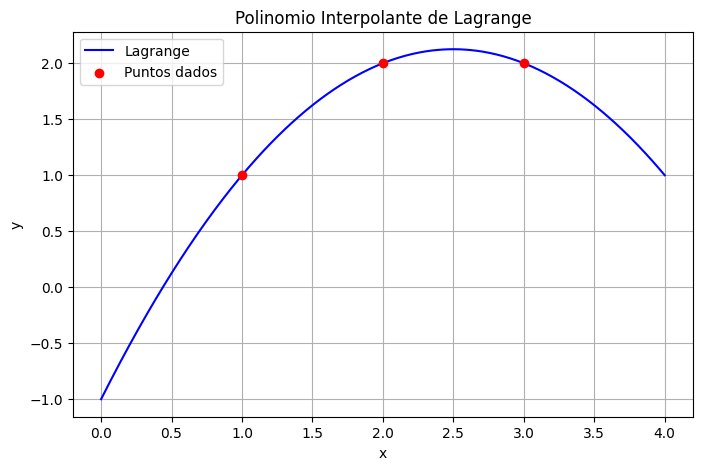

In [47]:
# Lista 2
puntos2 = [(1, 1), (2, 2), (3, 2)]
lagrange_f2 = graficar_lagrange(puntos2)

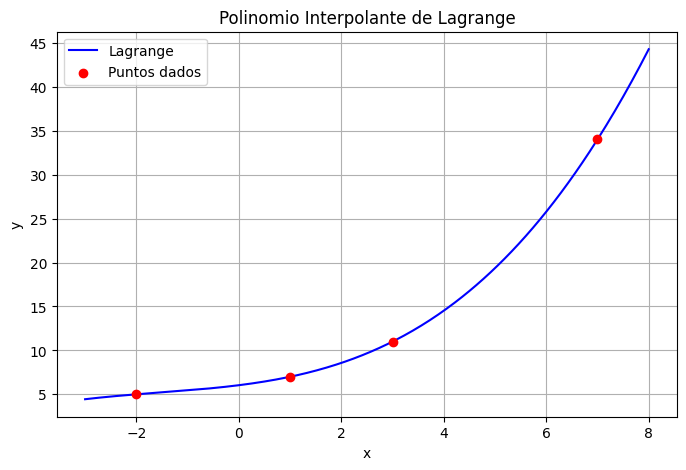

In [48]:
# Lista 3
puntos3 = [(-2, 5), (1, 7), (3, 11), (7, 34)]
lagrange_f3 = graficar_lagrange(puntos3)